## 模块与数据载入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data=pd.read_csv('./wine150.csv',index_col=0)

## 数据初步分析和预处理

In [43]:
data=data.dropna()
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### 对数值属性进行离散化处理

#### points

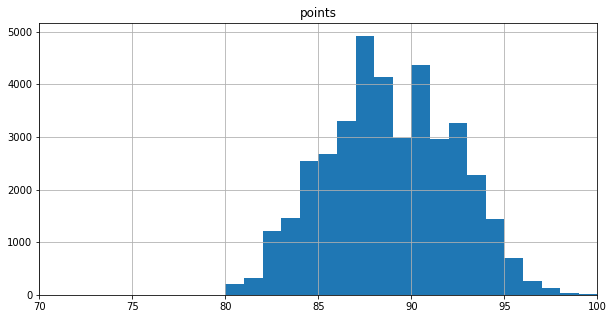

In [44]:
plt.figure(figsize=(10,5))
plt.title('points')
plt.xlim(70,100)
data['points'].hist(bins=20)
plt.show()

In [45]:
split=[0,80,85,90,95,100]
data['points']=pd.cut(data['points'],split)
data['points']=data['points'].astype('str')

In [46]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,"(95, 100]",235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,"(95, 100]",90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,"(95, 100]",65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,"(90, 95]",65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,"(90, 95]",60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


#### price

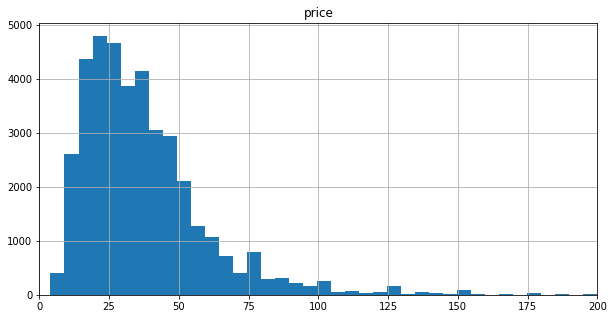

In [47]:
plt.figure(figsize=(10,5))
plt.title('price')
plt.xlim(0,200)
data['price'].hist(bins=400)
plt.show()

In [48]:
split=[0,15,30,40,50,60,100,250]
data['price']=pd.cut(data['price'],split)
data['price']=data['price'].astype('str')

#### description属于几乎不会重复的信息，暂时删去

In [49]:
data=data.drop(columns=['description'])

In [50]:
data.head()

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,"(95, 100]","(100.0, 250.0]",California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Special Selected Late Harvest,"(95, 100]","(60.0, 100.0]",California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,"(95, 100]","(60.0, 100.0]",Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,Silice,"(90, 95]","(60.0, 100.0]",Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,Gap's Crown Vineyard,"(90, 95]","(50.0, 60.0]",California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


## Apriori提取频繁项集

In [59]:
def CreateBase(dataSet):
    ret=[]
    for transaction in np.array(dataSet):
        for item in transaction:
            if [item] not in ret:
                ret.append([item])
    ret.sort()
    return list(map(frozenset,ret))

def scanD(D,Ck,minSupport):
    Cnt={}
    for item in D:
        if Ck is not None:
            for can in Ck:
                if can.issubset(item):
                    Cnt[can]=Cnt.get(can,0)+1
    lenD=float(len(D))
    retList=[]
    supportData={}
    for item in Cnt:
        support=Cnt[item]/lenD
        if support >= minSupport:
            retList.insert(0,item)
            supportData[item]=support
    return retList,supportData

def Extend(oldList,k):
    newList=[]
    lenL=len(oldList)
    for i in range(lenL):
        for j in range(i+1,lenL):
            tmp1=list(oldList[i])[:k-2]
            tmp1.sort()
            tmp2=list(oldList[j])[:k-2]
            tmp2.sort()
            if tmp1==tmp2:
                newList.append(oldList[i]|oldList[j])
    return newList

def Apriori(dataSet,minSupport):
    base=CreateBase(dataSet)
    D=list(map(set,dataSet))
    
    L1,supportData=scanD(D,base,minSupport)
    L=[L1]
    k=2
    
    while(len(L[k-2])>0):
        Ck=Extend(L[k-2],k)
        Lk,supportK=scanD(D,Ck,minSupport)
        supportData.update(supportK)
        L.append(Lk)
        k+=1
    return L,supportData

In [60]:
Data=list(map(set,np.array(data)))
L,supportData=Apriori(Data,0.05)

In [61]:
L

[[frozenset({'(80, 85]'}),
  frozenset({'Red Blend'}),
  frozenset({'Zinfandel'}),
  frozenset({'Paso Robles'}),
  frozenset({'(0.0, 15.0]'}),
  frozenset({'Columbia Valley (WA)'}),
  frozenset({'Russian River Valley'}),
  frozenset({'(85, 90]'}),
  frozenset({'(30.0, 40.0]'}),
  frozenset({'Washington'}),
  frozenset({'Syrah'}),
  frozenset({'Columbia Valley'}),
  frozenset({'Central Coast'}),
  frozenset({'(15.0, 30.0]'}),
  frozenset({'Chardonnay'}),
  frozenset({'(40.0, 50.0]'}),
  frozenset({'(50.0, 60.0]'}),
  frozenset({'(90, 95]'}),
  frozenset({'Willamette Valley'}),
  frozenset({'Pinot Noir'}),
  frozenset({'Oregon'}),
  frozenset({'Sonoma'}),
  frozenset({'(60.0, 100.0]'}),
  frozenset({'US'}),
  frozenset({'Napa Valley'}),
  frozenset({'Napa'}),
  frozenset({'California'}),
  frozenset({'Cabernet Sauvignon'})],
 [frozenset({'(15.0, 30.0]', '(80, 85]'}),
  frozenset({'(80, 85]', 'California'}),
  frozenset({'(80, 85]', 'US'}),
  frozenset({'(80, 85]', 'Central Coast'}),
  fr

## 关联规则和置信度

In [66]:
def select(L,supportData,minS=0.5):
    retList=[]
    for item in L:
        for record in item:
            if(len(record)>1):
                for i in record:
                    y=record-frozenset([i])
                    z=supportData[record]
                    ret=supportData.get(y)
                    try:
                        if supportData.get(y):
                            tmp=z/ret
                            if tmp>minS:
                                retList.append([frozenset([i]),'-->',record,'suppL',z,'con:',tmp])
                    except TypeError as e:
                        print(e)
    return retList

In [91]:
conf=select(L,supportData)
for i in conf:
    print(i)

[frozenset({'California'}), '-->', frozenset({'(80, 85]', 'California'}), 'suppL', 0.1727020208455442, 'con:', 0.8234507897934387]
[frozenset({'US'}), '-->', frozenset({'US', '(80, 85]'}), 'suppL', 0.209729619530593, 'con:', 1.0]
[frozenset({'(80, 85]'}), '-->', frozenset({'(80, 85]', '(0.0, 15.0]'}), 'suppL', 0.05364287352513952, 'con:', 0.5095618494311305]
[frozenset({'US'}), '-->', frozenset({'US', 'Red Blend'}), 'suppL', 0.07479422033077648, 'con:', 1.0]
[frozenset({'California'}), '-->', frozenset({'Zinfandel', 'California'}), 'suppL', 0.07023266481486201, 'con:', 0.9762663832801985]
[frozenset({'US'}), '-->', frozenset({'Zinfandel', 'US'}), 'suppL', 0.0719400626895339, 'con:', 1.0]
[frozenset({'California'}), '-->', frozenset({'Paso Robles', 'California'}), 'suppL', 0.05338803802145715, 'con:', 1.0]
[frozenset({'US'}), '-->', frozenset({'US', 'Paso Robles'}), 'suppL', 0.05338803802145715, 'con:', 1.0]
[frozenset({'Central Coast'}), '-->', frozenset({'Central Coast', 'Paso Robles'

### 全自信度评价

In [68]:
def all_confidence(L,supportData):
    ret=[]
    for item in L:
        score=supportData.get(item[2])/max(supportData.get(item[0]),supportData.get(item[2]-item[0]))
        ret.append(['confidence:{}'.format(score),item])
    return ret

In [69]:
confidence_score=all_confidence(conf,supportData)
for item in confidence_score:
    print(item)

['confidence:0.2373148439962181', [frozenset({'California'}), '-->', frozenset({'(80, 85]', 'California'}), 'suppL', 0.1727020208455442, 'con:', 0.8234507897934387]]
['confidence:0.209729619530593', [frozenset({'US'}), '-->', frozenset({'US', '(80, 85]'}), 'suppL', 0.209729619530593, 'con:', 1.0]]
['confidence:0.255771567436209', [frozenset({'(80, 85]'}), '-->', frozenset({'(80, 85]', '(0.0, 15.0]'}), 'suppL', 0.05364287352513952, 'con:', 0.5095618494311305]]
['confidence:0.07479422033077648', [frozenset({'US'}), '-->', frozenset({'US', 'Red Blend'}), 'suppL', 0.07479422033077648, 'con:', 1.0]]
['confidence:0.09650873691214064', [frozenset({'California'}), '-->', frozenset({'Zinfandel', 'California'}), 'suppL', 0.07023266481486201, 'con:', 0.9762663832801985]]
['confidence:0.0719400626895339', [frozenset({'US'}), '-->', frozenset({'Zinfandel', 'US'}), 'suppL', 0.0719400626895339, 'con:', 1.0]]
['confidence:0.07336204783415624', [frozenset({'California'}), '-->', frozenset({'Paso Robles

### Lift评价

In [74]:
def getLift(L,supportData):
    lift_true=[]
    lift_no=[]
    lift_false=[]
    for item in L:
        score=supportData.get(item[2])/(supportData.get(item[0])*supportData.get(item[2]-item[0]))
        if score>1:
            lift_true.append(["lift:{}".format(score),item])
        elif score<1:
            lift_no.append(["lift:{}".format(score),item])
        else:
            lift_false.append(["lift:{}".format(score),item])
    return lift_true,lift_no,lift_false

In [75]:
yes,no,false=getLift(conf,supportData)

In [76]:
for item in yes:
    print(item)

['lift:1.1315275568961842', [frozenset({'California'}), '-->', frozenset({'(80, 85]', 'California'}), 'suppL', 0.1727020208455442, 'con:', 0.8234507897934387]]
['lift:2.4296131875488447', [frozenset({'(80, 85]'}), '-->', frozenset({'(80, 85]', '(0.0, 15.0]'}), 'suppL', 0.05364287352513952, 'con:', 0.5095618494311305]]
['lift:1.341515885642689', [frozenset({'California'}), '-->', frozenset({'Zinfandel', 'California'}), 'suppL', 0.07023266481486201, 'con:', 0.9762663832801985]]
['lift:1.3741289351122317', [frozenset({'California'}), '-->', frozenset({'Paso Robles', 'California'}), 'suppL', 0.05338803802145715, 'con:', 1.0]]
['lift:4.288633879781421', [frozenset({'Central Coast'}), '-->', frozenset({'Central Coast', 'Paso Robles'}), 'suppL', 0.05338803802145715, 'con:', 1.0]]
['lift:1.1769711690996147', [frozenset({'(85, 90]'}), '-->', frozenset({'(85, 90]', '(15.0, 30.0]'}), 'suppL', 0.2218343059555057, 'con:', 0.5906900997489312]]
['lift:1.139379156232975', [frozenset({'(85, 90]'}), '--

In [77]:
for item in no:
    print(item)

['lift:0.9154206800844498', [frozenset({'California'}), '-->', frozenset({'California', '(0.0, 15.0]'}), 'suppL', 0.07013073061338906, 'con:', 0.6661825223916727]]
['lift:0.9350412236944764', [frozenset({'California'}), '-->', frozenset({'(85, 90]', 'California'}), 'suppL', 0.3415050584847481, 'con:', 0.6804610541281609]]
['lift:0.9298238271655817', [frozenset({'California'}), '-->', frozenset({'California', '(15.0, 30.0]'}), 'suppL', 0.2541219642720624, 'con:', 0.6766641785980865]]
['lift:0.9015691651000464', [frozenset({'California'}), '-->', frozenset({'Pinot Noir', '(85, 90]', 'California'}), 'suppL', 0.06014117886904004, 'con:', 0.6561023074784542]]
['lift:0.8610997519858961', [frozenset({'California'}), '-->', frozenset({'(85, 90]', '(15.0, 30.0]', 'California'}), 'suppL', 0.1390127672587345, 'con:', 0.6266513497989662]]
['lift:0.9154206800844498', [frozenset({'California'}), '-->', frozenset({'US', 'California', '(0.0, 15.0]'}), 'suppL', 0.07013073061338906, 'con:', 0.6661825223

In [78]:
for item in false:
    print(item)

['lift:1.0', [frozenset({'US'}), '-->', frozenset({'US', '(80, 85]'}), 'suppL', 0.209729619530593, 'con:', 1.0]]
['lift:1.0', [frozenset({'US'}), '-->', frozenset({'US', 'Red Blend'}), 'suppL', 0.07479422033077648, 'con:', 1.0]]
['lift:1.0', [frozenset({'US'}), '-->', frozenset({'Zinfandel', 'US'}), 'suppL', 0.0719400626895339, 'con:', 1.0]]
['lift:1.0', [frozenset({'US'}), '-->', frozenset({'US', 'Paso Robles'}), 'suppL', 0.05338803802145715, 'con:', 1.0]]
['lift:1.0', [frozenset({'US'}), '-->', frozenset({'US', '(0.0, 15.0]'}), 'suppL', 0.1052725465711883, 'con:', 1.0]]
['lift:1.0', [frozenset({'US'}), '-->', frozenset({'US', 'Columbia Valley (WA)'}), 'suppL', 0.07346907571162814, 'con:', 1.0]]
['lift:1.0', [frozenset({'US'}), '-->', frozenset({'US', '(30.0, 40.0]'}), 'suppL', 0.19823653831451798, 'con:', 1.0]]
['lift:1.0', [frozenset({'US'}), '-->', frozenset({'US', '(85, 90]'}), 'suppL', 0.5018730409520654, 'con:', 1.0]]
['lift:1.0', [frozenset({'(85, 90]'}), '-->', frozenset({'US'

### 可视化

In [96]:
rule=[]
Conf=[]
support=[]
for item in conf[0:100][:]:
    rule.append(str([item[0],item[1],item[2]]))
    Conf.append(item[4])
    support.append(item[6])

#### 支持度可视化

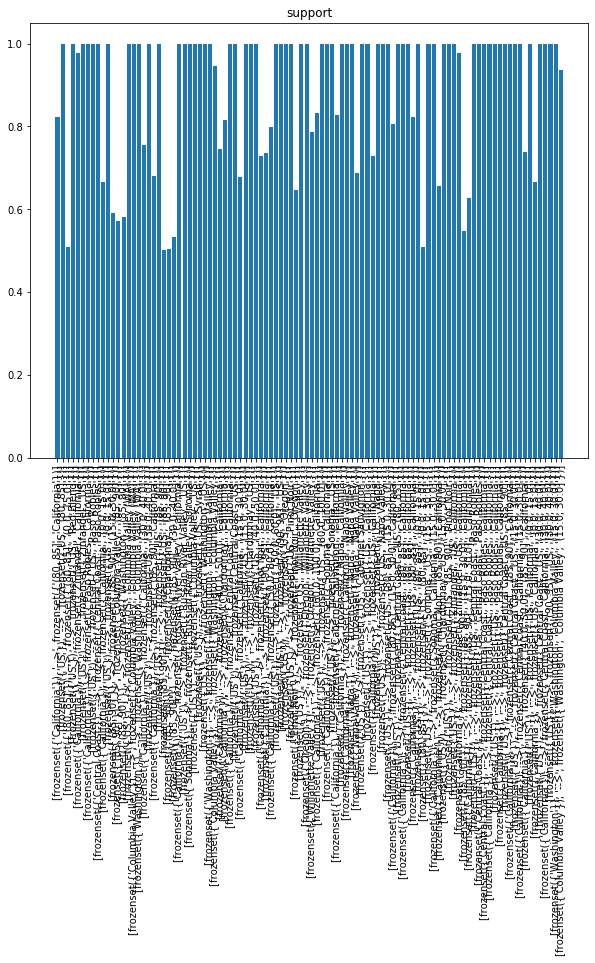

In [99]:
plt.figure(figsize=(10,8))
plt.title('support')
plt.xticks(range(len(support)),rule,rotation=90)
plt.bar(range(len(support)),support)
plt.show()

#### 置信度可视化

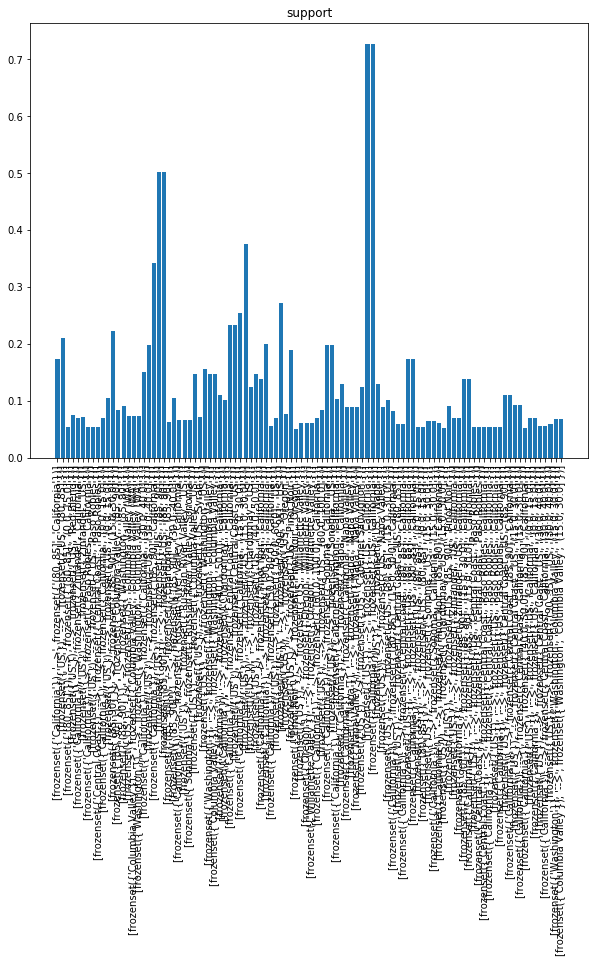

In [100]:
plt.figure(figsize=(10,8))
plt.title('support')
plt.xticks(range(len(Conf)),rule,rotation=90)
plt.bar(range(len(Conf)),Conf)
plt.show()